In [1]:
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
events_data = pd.read_csv('./event_data_train.csv')

In [4]:
events_data.head(10)

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632
5,32811,1434340895,passed,17632
6,32929,1434340921,discovered,17632
7,32929,1434340921,viewed,17632
8,32929,1434340939,started_attempt,17632
9,32929,1434340944,passed,17632


In [5]:
events_data.loc[events_data.timestamp >= 1526772750]

,step_id,timestamp,action,user_id
3480699,32815,1526772750,viewed,5198
3480700,32815,1526772750,discovered,5198
3480701,32815,1526772750,passed,5198
3480702,33892,1526772811,viewed,18526


In [6]:
events_data.action.unique()

array(['viewed', 'passed', 'discovered', 'started_attempt'], dtype=object)

In [7]:
events_data['date'] = pd.to_datetime(events_data.timestamp, unit='s')

In [8]:
events_data.head()

,step_id,timestamp,action,user_id,date
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48
1,32815,1434340848,passed,17632,2015-06-15 04:00:48
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35


In [9]:
events_data['day'] = events_data.date.dt.date

In [10]:
events_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [51]:
unique_by_group = events_data.groupby('day') \
    .user_id.nunique()

In [52]:
unique_by_group

day
2015-06-15    705
2015-06-16    526
2015-06-17    440
2015-06-18    411
2015-06-19    377
             ... 
2018-05-15    145
2018-05-16    155
2018-05-17    165
2018-05-18    126
2018-05-19    131
Name: user_id, Length: 1070, dtype: int64

In [12]:
sns.set(rc={'figure.figsize': (20, 10)})

<AxesSubplot:xlabel='day'>

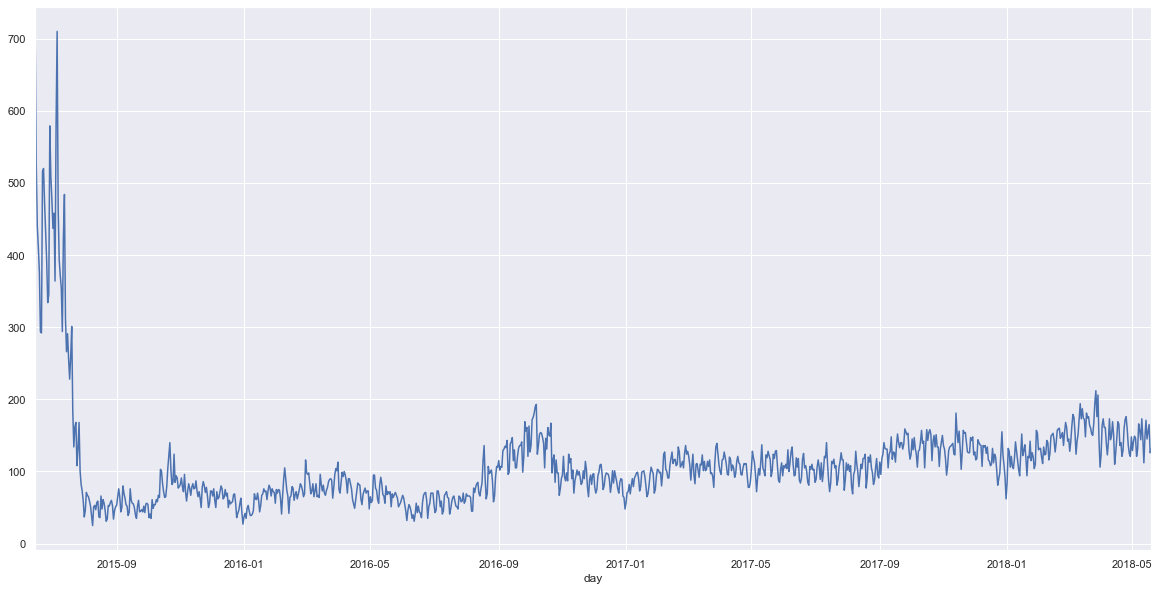

In [13]:
unique_by_group.plot()

In [14]:
#passed_steps = events_data[events_data.action == 'passed'] \
#    .groupby('user_id', as_index=False) \
#    .agg({'step_id': 'count'}) \
#    .rename(columns={'step_id' : 'passed_steps'}).passed_steps

In [15]:
passed_steps = events_data.pivot_table(index = 'user_id', 
                                       columns='action', 
                                       values='step_id', 
                                       aggfunc='count', 
                                       fill_value=0).reset_index()

In [16]:
passed_steps

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1
...,...,...,...,...,...
19229,26790,8,8,1,9
19230,26793,1,0,1,1
19231,26794,69,69,34,180
19232,26797,10,10,2,13


<AxesSubplot:>

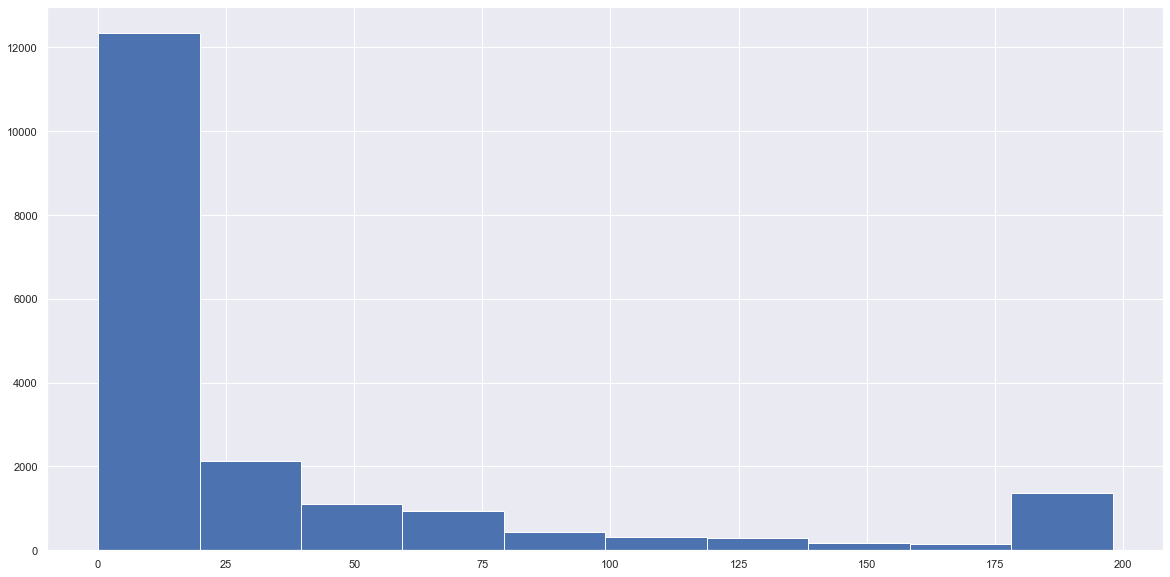

In [17]:
passed_steps.passed.hist()

In [18]:
submissions_data = pd.read_csv('./submissions_data_train.csv')

In [19]:
submissions_data.head()

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853


In [20]:
submissions_data['date'] = pd.to_datetime(submissions_data.timestamp, unit='s')
submissions_data['day'] = submissions_data.date.dt.date

In [21]:
submissions_data.head()

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15


In [22]:
users_scores = submissions_data.pivot_table(index = 'user_id', 
                                       columns='submission_status', 
                                       values='step_id', 
                                       aggfunc='count', 
                                       fill_value=0).reset_index()

In [23]:
users_scores.head()

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1


In [24]:
events_data = events_data[['user_id', 'day', 'timestamp']].drop_duplicates(subset=['user_id', 'day'])

In [25]:
gap_data = events_data.groupby('user_id')['timestamp'].apply(list)\
    .apply(np.diff).values

In [26]:
gap_data = pd.Series(np.concatenate(gap_data, axis = 0))

In [27]:
gap_data = gap_data // (24 * 60 * 60)

<AxesSubplot:>

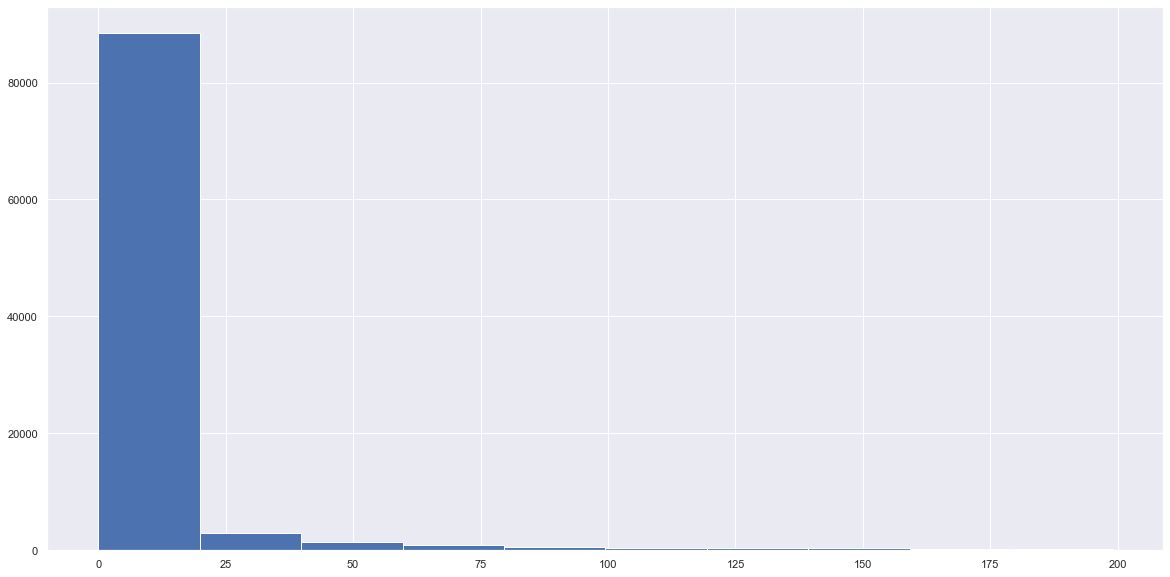

In [28]:
gap_data[gap_data < 200].hist()

In [29]:
gap_data.quantile(0.90)

18.0

In [30]:
events_data.head()

,user_id,day,timestamp
0,17632,2015-06-15,1434340848
36,12494,2015-06-15,1434341931
59,442,2015-06-15,1434342029
62,22254,2015-06-15,1434342042
94,6646,2015-06-15,1434342230


In [31]:
users_data = events_data.groupby('user_id', as_index=False)\
    .agg({'timestamp': 'max'}).rename(columns={'timestamp' : 'last_timestamp'})

In [32]:
users_data

,user_id,last_timestamp
0,1,1472827464
1,2,1519226966
2,3,1444552901
3,5,1499859621
4,7,1521634660
...,...,...
19229,26790,1517495853
19230,26793,1510225031
19231,26794,1512035039
19232,26797,1509993306


In [33]:
now = 1526772811
drop_out_threshold = 259200

In [34]:
users_data['is_gone_user'] = (now - users_data.last_timestamp) > drop_out_threshold

In [35]:
users_data.head(100)

,user_id,last_timestamp,is_gone_user
0,1,1472827464,True
1,2,1519226966,True
2,3,1444552901,True
3,5,1499859621,True
4,7,1521634660,True
...,...,...,...
95,133,1441020151,True
96,134,1489403260,True
97,135,1470244717,True
98,137,1434807899,True


In [36]:
users_scores

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1
...,...,...,...
9935,26787,3,0
9936,26790,1,0
9937,26794,33,9
9938,26797,2,0


In [37]:
users_data = users_data.merge(users_scores, on='user_id', how='outer')

In [38]:
users_data = users_data.fillna(0)

In [39]:
users_data

,user_id,last_timestamp,is_gone_user,correct,wrong
0,1,1472827464,True,0.0,0.0
1,2,1519226966,True,2.0,0.0
2,3,1444552901,True,29.0,23.0
3,5,1499859621,True,2.0,2.0
4,7,1521634660,True,0.0,0.0
...,...,...,...,...,...
19229,26790,1517495853,True,1.0,0.0
19230,26793,1510225031,True,0.0,0.0
19231,26794,1512035039,True,33.0,9.0
19232,26797,1509993306,True,2.0,0.0


In [40]:
users_data = users_data.merge(passed_steps, on='user_id', how='outer')

In [41]:
users_data

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed
0,1,1472827464,True,0.0,0.0,1,0,0,1
1,2,1519226966,True,2.0,0.0,9,9,2,10
2,3,1444552901,True,29.0,23.0,91,87,30,192
3,5,1499859621,True,2.0,2.0,11,11,4,12
4,7,1521634660,True,0.0,0.0,1,1,0,1
...,...,...,...,...,...,...,...,...,...
19229,26790,1517495853,True,1.0,0.0,8,8,1,9
19230,26793,1510225031,True,0.0,0.0,1,0,1,1
19231,26794,1512035039,True,33.0,9.0,69,69,34,180
19232,26797,1509993306,True,2.0,0.0,10,10,2,13


In [42]:
users_day = events_data.groupby('user_id').day.nunique().to_frame().reset_index()

In [43]:
users_day

,user_id,day
0,1,1
1,2,2
2,3,7
3,5,2
4,7,1
...,...,...
19229,26790,4
19230,26793,1
19231,26794,9
19232,26797,2


In [44]:
users_data = users_data.merge(users_day, on='user_id', how='outer')

In [45]:
users_data

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day
0,1,1472827464,True,0.0,0.0,1,0,0,1,1
1,2,1519226966,True,2.0,0.0,9,9,2,10,2
2,3,1444552901,True,29.0,23.0,91,87,30,192,7
3,5,1499859621,True,2.0,2.0,11,11,4,12,2
4,7,1521634660,True,0.0,0.0,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...
19229,26790,1517495853,True,1.0,0.0,8,8,1,9,4
19230,26793,1510225031,True,0.0,0.0,1,0,1,1,1
19231,26794,1512035039,True,33.0,9.0,69,69,34,180,9
19232,26797,1509993306,True,2.0,0.0,10,10,2,13,2


In [46]:
users_data.user_id.nunique()

19234

In [47]:
events_data.user_id.nunique()

19234

In [48]:
users_data['passed_course'] = users_data.passed > 170

In [49]:
users_data

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day,passed_course
0,1,1472827464,True,0.0,0.0,1,0,0,1,1,False
1,2,1519226966,True,2.0,0.0,9,9,2,10,2,False
2,3,1444552901,True,29.0,23.0,91,87,30,192,7,False
3,5,1499859621,True,2.0,2.0,11,11,4,12,2,False
4,7,1521634660,True,0.0,0.0,1,1,0,1,1,False
...,...,...,...,...,...,...,...,...,...,...,...
19229,26790,1517495853,True,1.0,0.0,8,8,1,9,4,False
19230,26793,1510225031,True,0.0,0.0,1,0,1,1,1,False
19231,26794,1512035039,True,33.0,9.0,69,69,34,180,9,False
19232,26797,1509993306,True,2.0,0.0,10,10,2,13,2,False


In [55]:
users_data.groupby('passed_course', as_index=False).count()

,passed_course,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day
0,False,17809,17809,17809,17809,17809,17809,17809,17809,17809,17809
1,True,1425,1425,1425,1425,1425,1425,1425,1425,1425,1425


In [59]:
user_min_time = events_data.groupby('user_id', as_index=False) \
    .agg({'timestamp': 'min'}) \
    .rename({'timestamp': 'min_timestamp'}, axis = 1)

In [61]:
user_min_time

,user_id,min_timestamp
0,1,1472827464
1,2,1514383364
2,3,1434358476
3,5,1466156809
4,7,1521634660
...,...,...
19229,26790,1451484016
19230,26793,1510225031
19231,26794,1495287049
19232,26797,1508425316


In [62]:
users_data = users_data.merge(user_min_time, how='outer')

In [63]:
users_data

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day,passed_course,min_timestamp
0,1,1472827464,True,0.0,0.0,1,0,0,1,1,False,1472827464
1,2,1519226966,True,2.0,0.0,9,9,2,10,2,False,1514383364
2,3,1444552901,True,29.0,23.0,91,87,30,192,7,False,1434358476
3,5,1499859621,True,2.0,2.0,11,11,4,12,2,False,1466156809
4,7,1521634660,True,0.0,0.0,1,1,0,1,1,False,1521634660
...,...,...,...,...,...,...,...,...,...,...,...,...
19229,26790,1517495853,True,1.0,0.0,8,8,1,9,4,False,1451484016
19230,26793,1510225031,True,0.0,0.0,1,0,1,1,1,False,1510225031
19231,26794,1512035039,True,33.0,9.0,69,69,34,180,9,False,1495287049
19232,26797,1509993306,True,2.0,0.0,10,10,2,13,2,False,1508425316


<AxesSubplot:>

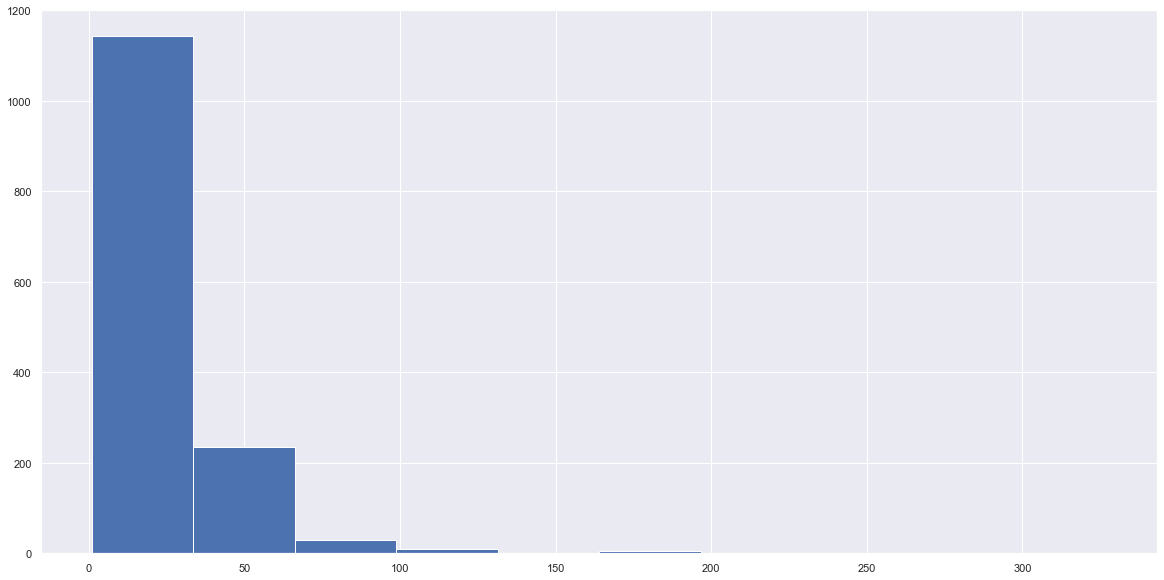

In [74]:
users_data[users_data.passed_course==True].day.hist()

In [75]:
events_data

,user_id,day,timestamp,min_timestamp
0,17632,2015-06-15,1434340848,1434340848
1,17632,2015-06-16,1434477295,1434340848
2,17632,2015-06-17,1434557155,1434340848
3,17632,2015-06-18,1434605706,1434340848
4,17632,2015-06-19,1434735091,1434340848
...,...,...,...,...
117101,795,2018-05-19,1526758323,1526758323
117102,13475,2018-05-19,1526760094,1526760094
117103,22851,2018-05-19,1526762629,1526762629
117104,943,2018-05-19,1526762664,1526762664


In [69]:
events_data = events_data.merge(user_min_time, how='outer')

In [70]:
events_data

,user_id,day,timestamp,min_timestamp
0,17632,2015-06-15,1434340848,1434340848
1,17632,2015-06-16,1434477295,1434340848
2,17632,2015-06-17,1434557155,1434340848
3,17632,2015-06-18,1434605706,1434340848
4,17632,2015-06-19,1434735091,1434340848
...,...,...,...,...
117101,795,2018-05-19,1526758323,1526758323
117102,13475,2018-05-19,1526760094,1526760094
117103,22851,2018-05-19,1526762629,1526762629
117104,943,2018-05-19,1526762664,1526762664


In [71]:
events_data_train = events_data.query('timestamp < min_timestamp + 3 * 24 * 60 * 60')

In [72]:
events_data_train

,user_id,day,timestamp,min_timestamp
0,17632,2015-06-15,1434340848,1434340848
1,17632,2015-06-16,1434477295,1434340848
2,17632,2015-06-17,1434557155,1434340848
20,12494,2015-06-15,1434341931,1434341931
21,12494,2015-06-16,1434437757,1434341931
...,...,...,...,...
117101,795,2018-05-19,1526758323,1526758323
117102,13475,2018-05-19,1526760094,1526760094
117103,22851,2018-05-19,1526762629,1526762629
117104,943,2018-05-19,1526762664,1526762664


In [79]:
events_data = pd.read_csv('./event_data_train.csv')

In [80]:
events_data

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632
...,...,...,...,...
3480698,33375,1526772685,viewed,11677
3480699,32815,1526772750,viewed,5198
3480700,32815,1526772750,discovered,5198
3480701,32815,1526772750,passed,5198


In [82]:
learning_time_threshold = 3 * 24 * 60 * 60
learning_time_threshold

259200

In [195]:
submissions_train = pd.read_csv('./submissions_data_train.csv')

In [196]:
last_submissions_train =submissions_train.groupby('user_id', as_index=False)\
    .agg({'timestamp': 'max'})\
    .rename({'timestamp': 'last_timestamp'}, axis = 1)

In [197]:
last_submissions_train

,user_id,last_timestamp
0,2,1514383485
1,3,1444573728
2,5,1499859730
3,8,1480604143
4,14,1436368601
...,...,...
9935,26787,1469015051
9936,26790,1451722691
9937,26794,1511374868
9938,26797,1508425828


In [184]:
#wrong_last_submissions_train = submissions_train.query("submission_status == 'wrong'").groupby('user_id', as_index=False)\
#    .agg({'timestamp': 'max'})\
#    .rename({'timestamp': 'wrong_last_timestamp'}, axis = 1)

In [198]:
submissions_train = submissions_train.merge(last_submissions_train, how='outer')

In [186]:
#submissions_train = submissions_train[submissions_train.submission_status == 'wrong']\
#    .merge(wrong_last_submissions_train, how='outer')

In [199]:
submissions_train

,step_id,timestamp,submission_status,user_id,last_timestamp
0,31971,1434349275,correct,15853,1479734163
1,31972,1434348300,correct,15853,1479734163
2,31972,1478852149,wrong,15853,1479734163
3,31972,1478852164,correct,15853,1479734163
4,31976,1434348123,wrong,15853,1479734163
...,...,...,...,...,...
509099,120745,1501946959,wrong,2615,1501946959
509100,120745,1503059927,correct,13177,1503059927
509101,120745,1506348153,wrong,15253,1506348153
509102,120745,1523035316,wrong,1424,1523035316


In [200]:
submissions_train = submissions_train.query("submission_status == 'wrong' & last_timestamp == timestamp")\
    .groupby('step_id', as_index=False)\
    .agg({"user_id": pd.Series.nunique})

In [202]:
submissions_train

,step_id,user_id
0,31971,43
1,31972,45
2,31976,37
3,31977,60
4,31978,154
...,...,...
67,33984,2
68,33992,6
69,33994,5
70,33998,2


In [204]:
submissions_train[submissions_train.user_id == submissions_train.user_id.max()]

,step_id,user_id
4,31978,154
